In [1]:
# Importing the neccessary libraries 

import pandas as pd
import numpy as np

# Warning Suppression 
import warnings
warnings.filterwarnings('ignore')

In [2]:
### Setting Display options to ensure feature name visibility

pd.set_option('display.max_columns', None)

## Load the Data

In [3]:
X = pd.read_csv(r'C:\Users\priya\PycharmProjects\Employee_attrition_project\Data\independent_features')

In [4]:
Y = pd.read_csv(r'C:\Users\priya\PycharmProjects\Employee_attrition_project\Data\target_feature')

In [5]:
X.head()

,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,NumCompaniesWorked,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2,3,4,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,41.0,1,5993.0,11,8,6,8,4,0,5
1,3,2,2,4,1,3,3,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,49.0,8,5130.0,23,10,10,1,7,1,7
2,4,2,3,2,0,3,3,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,37.0,2,2090.0,15,7,0,6,0,0,0
3,4,3,3,3,0,3,3,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,33.0,3,2909.0,11,8,8,1,7,3,0
4,1,3,2,4,1,3,3,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,27.0,2,3468.0,12,6,2,9,2,2,2


In [6]:
Y.head()

,Attrition
0,1
1,0
2,1
3,0
4,0


# Split the data into test and train sets

In [7]:
from sklearn.model_selection import train_test_split 

In [8]:
#Train Test Split
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size = 0.2, random_state=18)

In [9]:
# To check if the testing data is a representator of the population

print("Shape of Training Data", x_train.shape)
print("Shape of Testing Data", x_test.shape)
print("Attrition Rate in Training Data", y_train.mean())
print("Attrition Rate in Testing Data", y_test.mean())

Shape of Training Data (1176, 37)
Shape of Testing Data (294, 37)
Attrition Rate in Training Data Attrition    0.162415
dtype: float64
Attrition Rate in Testing Data Attrition    0.156463
dtype: float64


# Importing necessary libraries for Model Building

In [10]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
from urllib.request import urlopen 

plt.style.use('ggplot')
pd.set_option('display.max_columns', 500) 

# Oversampling Using SMOTE


In [11]:
# pip install imblearn (if you do not have imblearn installed)
from imblearn.over_sampling import SMOTE

In [12]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train['Attrition'] == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train['Attrition'] == 0)))

Before OverSampling, count of label '1': 191
Before OverSampling, count of label '0': 985 



In [13]:
sm = SMOTE(random_state = 18)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

In [14]:
print('The shape of x_train: {}'.format(x_train_res.shape))
print('The shape of y_train: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, count of label '1': {}".format(sum(y_train_res['Attrition'] == 1)))
print("After OverSampling, count of label '0': {}".format(sum(y_train_res['Attrition'] == 0)))

The shape of x_train: (1970, 37)
The shape of y_train: (1970, 1) 

After OverSampling, count of label '1': 985
After OverSampling, count of label '0': 985


# Decision Tree Model

In [15]:
# Building a Decision Tree Model
model_dt=DecisionTreeClassifier(criterion='gini',random_state=18)

In [16]:
# Finding the best parameters
from func_for_model import gridsearch
gridsearch(x_train_res, y_train_res, model=model_dt)

The time taken in grid search:  7.33


('Best Parameters using grid search:',
 {'max_depth': 5, 'max_features': None, 'min_samples_split': 35})

In [17]:
# Decision tree with depth = 4
model_dt = DecisionTreeClassifier(random_state=18, criterion = "gini", max_depth= 5, min_samples_split= 35)
model_dt.fit(x_train_res, y_train_res)
model_dt_score_train = model_dt.score(x_train_res, y_train_res)
print("Training score: ", model_dt_score_train)
model_dt_score_test = model_dt.score(x_test, y_test)
print("Testing score: ", model_dt_score_test)

Training score:  0.8360406091370558
Testing score:  0.7210884353741497


In [18]:
# Predictions
y_pred_dt=model_dt.predict(x_test)

# 1.1 Performance Metrics
### AUC - Decision Tree

In [19]:
#Area Under the Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_dt ## Area Under the Curve

0.6310483870967741

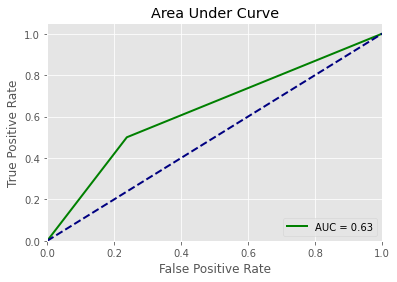

In [20]:
from func_for_model import auc_chart
auc_chart(fpr_dt, tpr_dt, roc_auc_dt)

### Confusion Matrix - Decision Tree

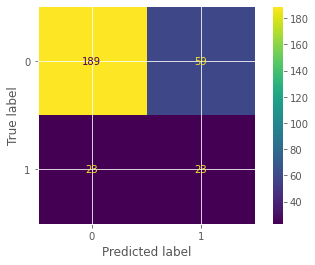

In [21]:
cm = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(cm).plot()
plt.show()

### precision,  recall,  f1-score

In [22]:
print("Classification Report\n", classification_report(y_test, y_pred_dt))

Classification Report
               precision    recall  f1-score   support

           0       0.89      0.76      0.82       248
           1       0.28      0.50      0.36        46

    accuracy                           0.72       294
   macro avg       0.59      0.63      0.59       294
weighted avg       0.80      0.72      0.75       294



# Random Forest Model

In [23]:
# Buidling Random Forest
model_rf=RandomForestClassifier(criterion='gini',random_state=18)

In [24]:
# Find best parameters
gridsearch(x_train, y_train, model=model_rf)

The time taken in grid search:  117.32


('Best Parameters using grid search:',
 {'max_depth': 5, 'max_features': None, 'min_samples_split': 25})

In [25]:
rf=RandomForestClassifier(criterion='gini', random_state=18, max_depth=5, min_samples_split=25)
rf.fit(x_train_res,y_train_res)
model_rf_score_train = rf.score(x_train_res, y_train_res)
print("Training score: ", model_rf_score_train)
model_rf_score_test = rf.score(x_test, y_test)
print("Testing score: ", model_rf_score_test)

Training score:  0.8934010152284264
Testing score:  0.8197278911564626


In [26]:
# predictions
y_pred_rf=rf.predict(x_test)

# 2.1 Performance Metrics
### AUC - Random Forest

In [27]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_rf

0.6718092566619915

### Confusion Matrix

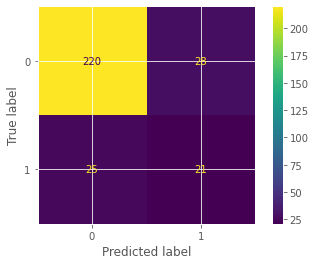

In [28]:
cm = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm).plot()
plt.show()

### precision,  recall,  f1-score

In [29]:
print("Classification Report\n", classification_report(y_test, y_pred_rf))

Classification Report
               precision    recall  f1-score   support

           0       0.90      0.89      0.89       248
           1       0.43      0.46      0.44        46

    accuracy                           0.82       294
   macro avg       0.66      0.67      0.67       294
weighted avg       0.82      0.82      0.82       294



# Gradient Boosting Model (GBM)

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='friedman_mse', random_state=18, max_depth=3, min_samples_split=40)
gbm.fit(x_train,y_train)
model_gbm_score_train = gbm.score(x_train, y_train)
print("Training score: ", model_gbm_score_train)
model_gbm_score_test = gbm.score(x_test, y_test)
print("Testing score: ", model_gbm_score_test)

Training score:  0.9447278911564626
Testing score:  0.8707482993197279


In [31]:
# predicitons
y_pred_gbm=gbm.predict(x_test)

# 3.1 Performance Metrics
### AUC

In [32]:
fpr_gbm, tpr_gbm, _ = roc_curve(y_test, y_pred_gbm)
roc_auc_gbm = auc(fpr_gbm, tpr_gbm)
roc_auc_gbm

0.6577840112201964

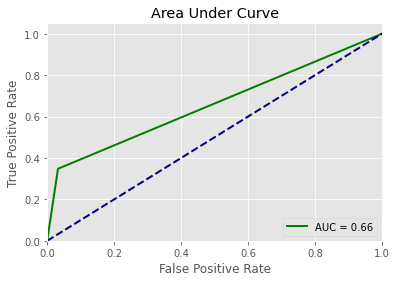

In [33]:
from func_for_model import auc_chart
auc_chart(fpr_gbm, tpr_gbm, roc_auc_gbm)

### Confusion Matrix

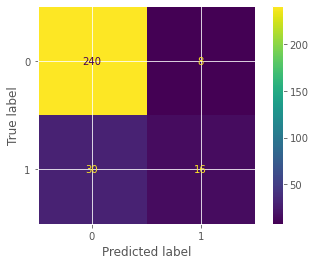

In [34]:
cm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(cm).plot()
plt.show()

### precision, recall,  f1-score

In [35]:
print("Classification Report\n", classification_report(y_test, y_pred_gbm))

Classification Report
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       248
           1       0.67      0.35      0.46        46

    accuracy                           0.87       294
   macro avg       0.78      0.66      0.69       294
weighted avg       0.85      0.87      0.85       294



                                             **************************************